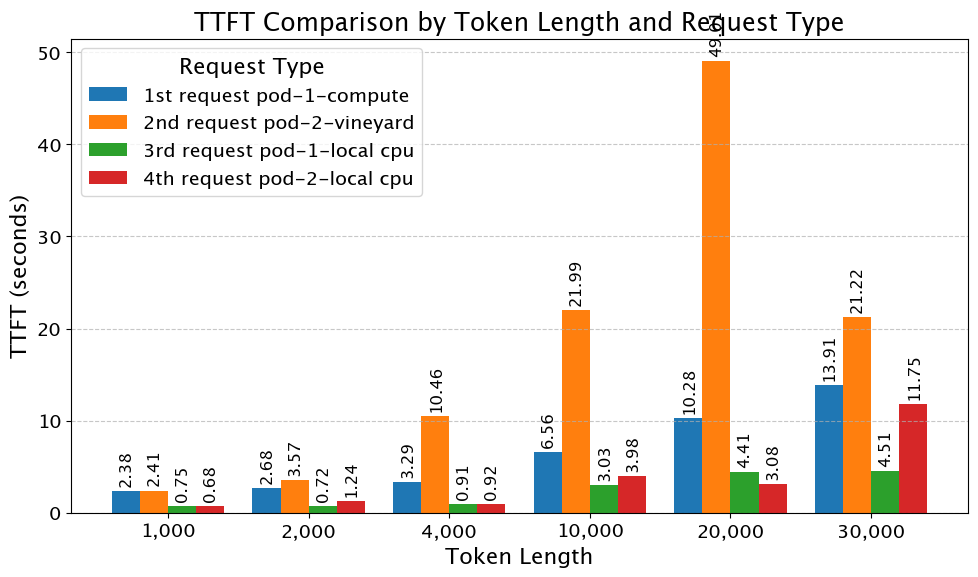

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
plt.rcParams.update({'font.size': 14})
column_names = ['type', 'numeric_id', 'request_id', 'feature1', 'feature1_val', 
                'metric', 'token_length', 'feature2', 'feature2_val', 
                'measure', 'ttft', 'target', 'pod']
df = pd.read_csv('results-mar-21st.csv', names=column_names)
plot_data = df[['request_id', 'token_length', 'ttft']].copy()
request_id_mapping = {
    '#0': '1st request pod-1-compute',
    '#1': '2nd request pod-2-vineyard',
    '#2': '3rd request pod-1-local cpu',
    '#3': '4th request pod-2-local cpu'
}
plot_data['request_type'] = plot_data['request_id'].map(request_id_mapping)
fig, ax = plt.subplots(figsize=(10, 6))
# fig, ax = plt.subplots()
bar_width = 0.2
token_lengths = sorted(plot_data['token_length'].unique())
request_types = list(request_id_mapping.values())
x = np.arange(len(token_lengths))
for i, request_type in enumerate(request_types):
    data = plot_data[plot_data['request_type'] == request_type]
    ttft_values = []
    for token_length in token_lengths:
        ttft = data[data['token_length'] == token_length]['ttft'].values
        ttft_values.append(ttft[0] if len(ttft) > 0 else 0)
    position = x + (i - 1.5) * bar_width
    bars = ax.bar(position, ttft_values, bar_width, label=request_type)
    for j, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{ttft_values[j]:.2f}', ha='center', va='bottom', fontsize=12, rotation=90)
ax.set_xlabel('Token Length', fontweight='bold', fontsize=16)
ax.set_ylabel('TTFT (seconds)', fontweight='bold', fontsize=16)
ax.set_title('TTFT Comparison by Token Length and Request Type', fontweight='bold', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels([f'{length:,}' for length in token_lengths], fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(title='Request Type', fontsize=14, title_fontsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(bottom=0)
plt.tight_layout()
plt.savefig('ttft_comparison.pdf', bbox_inches='tight')
plt.show()